<a href="https://colab.research.google.com/github/soymlk94/datavis_sp24/blob/main/PS_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

P3 (Cervical Cancer & Inequity in NJ) - Where you live and who you are still matter when it comes to cervical cancer risk — and we can see it clearly in the gaps in screening, outcomes, and access.



In the notebook:
You’ll back this up with:

Correlations: e.g., screening rate vs. uninsurance, death rate vs. poverty

Outliers/edge cases: e.g., counties with good outcomes despite high poverty—what’s working there?

Sensitivity checks (e.g., exclude years with incomplete data, normalize rates)

All Data is from thee New Jersey Department of Public Health - New Jersey State Health Assessment Data

In [2]:
# Cervical Cancer & Health Equity in New Jersey
# Storytelling Notebook (Google Colab Compatible)

import pandas as pd
import matplotlib.pyplot as plt

# === Load files from Google Drive share links ===
file_links = {
    "Cervical_Cancer_Data": "https://docs.google.com/uc?id=1CmNGDUG_44O4p-jLZFnIsc3Yd9abMptm&export=download",
    "Socioeconomic_Health_Data": "https://docs.google.com/uc?id=1vmR6MEpGrImLIk_9YxzZ3s_ZoyFEaz3-&export=download"
}



In [3]:
# Load specific sheets from each Excel file
datasets = {}

# Cervical cancer data
datasets["Incidence_Race"] = pd.read_excel(file_links["Cervical_Cancer_Data"], sheet_name="Incidence_Race_2010-2020")
datasets["Deaths_by_Race"] = pd.read_excel(file_links["Cervical_Cancer_Data"], sheet_name="Deaths_by_Race_2000-2020")
datasets["Screening_by_Race"] = pd.read_excel(file_links["Cervical_Cancer_Data"], sheet_name="Screening_by_Race_2012-2020")
datasets["Screening_by_County"] = pd.read_excel(file_links["Cervical_Cancer_Data"], sheet_name="Screening_by_County_2017-2020")

# Socioeconomic health data
datasets["Uninsured_by_County"] = pd.read_excel(file_links["Socioeconomic_Health_Data"], sheet_name="Uninsured_By_County_2022")
datasets["Poverty_by_Race"] = pd.read_excel(file_links["Socioeconomic_Health_Data"], sheet_name="Poverty_By_Race_2010-2023")
datasets["Income_Inequality"] = pd.read_excel(file_links["Socioeconomic_Health_Data"], sheet_name="Income_Inequality_2023")

Start with Cervical Cancer Outcomes (Graph 1)
From Deaths_by_Race_2000-2020: Show persistent racial disparities in cervical cancer deaths.

Line graph of death rates over time by race — highlight that Black and Hispanic women die at higher rates than White and Asian women, even in recent years.



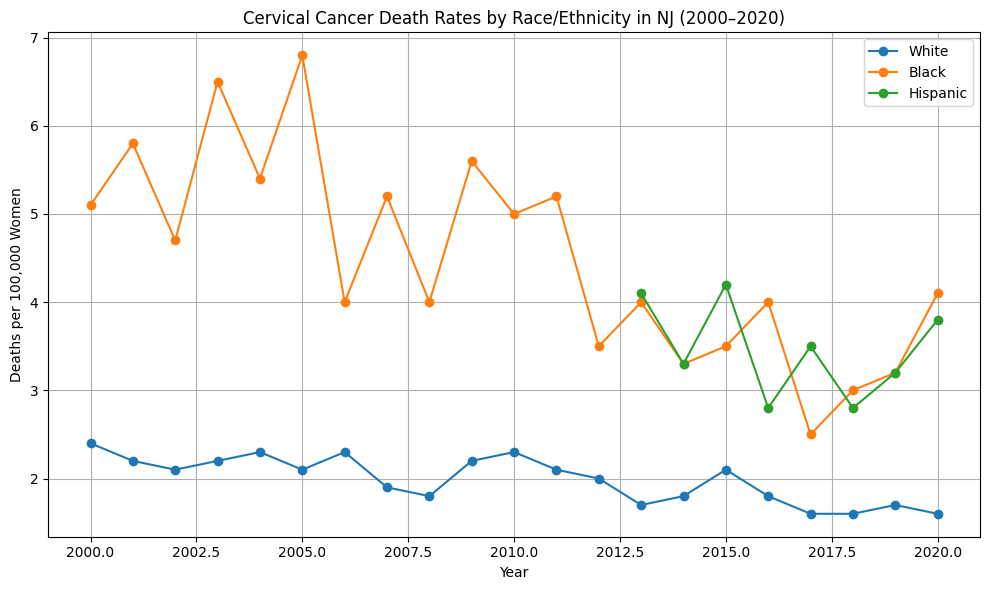

In [4]:
# === Graph 1: Cervical Cancer Death Rates by Race ===
df1 = datasets["Deaths_by_Race"]
plt.figure(figsize=(10,6))
for race in ["White", "Black", "Hispanic"]:
    plt.plot(df1["Year"], df1[race], label=race, marker='o')
plt.title("Cervical Cancer Death Rates by Race/Ethnicity in NJ (2000–2020)")
plt.xlabel("Year"); plt.ylabel("Deaths per 100,000 Women")
plt.legend(); plt.grid(True); plt.tight_layout()
plt.show()

Cervical Cancer Death Rates by Race/Ethnicity in New Jersey (2000–2020)

Key message:
Despite overall declines, Black and Hispanic women continue to die from cervical cancer at rates nearly double those of White women — revealing a persistent racial health gap over two decades.





Then Look at Screening Rates (Graph 2 & 3)
From Screening_by_Race_2012-2020: Line plot by race.

From Screening_by_County_2017-2020: Bar chart to show geographic disparities.

 Point: Lower screening among Hispanic women & some counties correlate with worse outcomes.

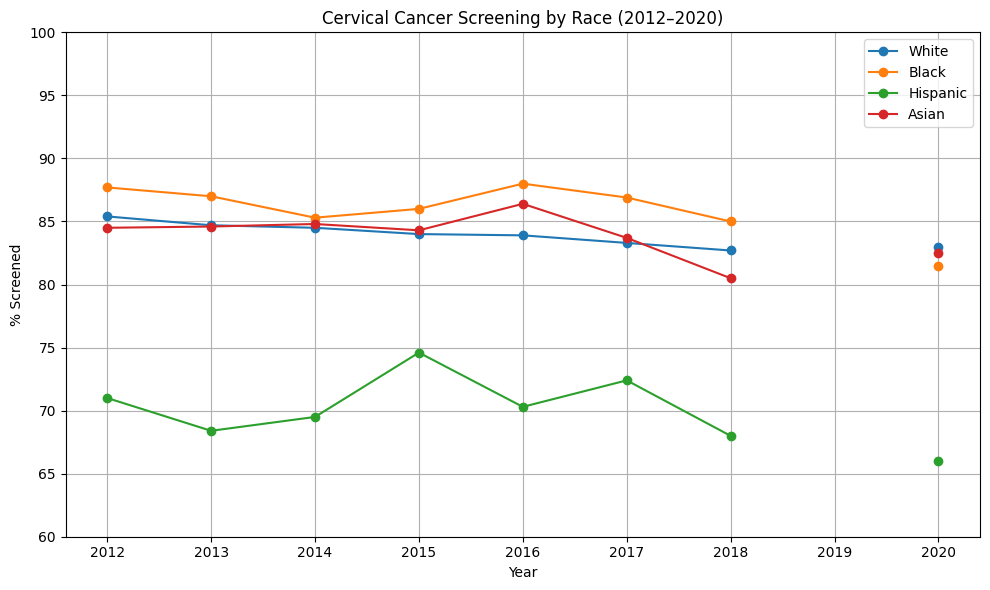

In [5]:
# === Graph 2: Screening by Race ===
df2 = datasets["Screening_by_Race"]
plt.figure(figsize=(10,6))
for race in ["White", "Black", "Hispanic", "Asian"]:
    plt.plot(df2["Year"], df2[race], label=race, marker='o')
plt.title("Cervical Cancer Screening by Race (2012–2020)")
plt.xlabel("Year"); plt.ylabel("% Screened")
plt.ylim(60, 100); plt.legend(); plt.grid(True)
plt.tight_layout(); plt.show()

Key takeaway:

While screening rates declined slightly for all groups, Hispanic women consistently have the lowest screening rates — often 15–20 percentage points below Black and White women. This gap likely contributes to their higher cervical cancer death rates seen earlier.



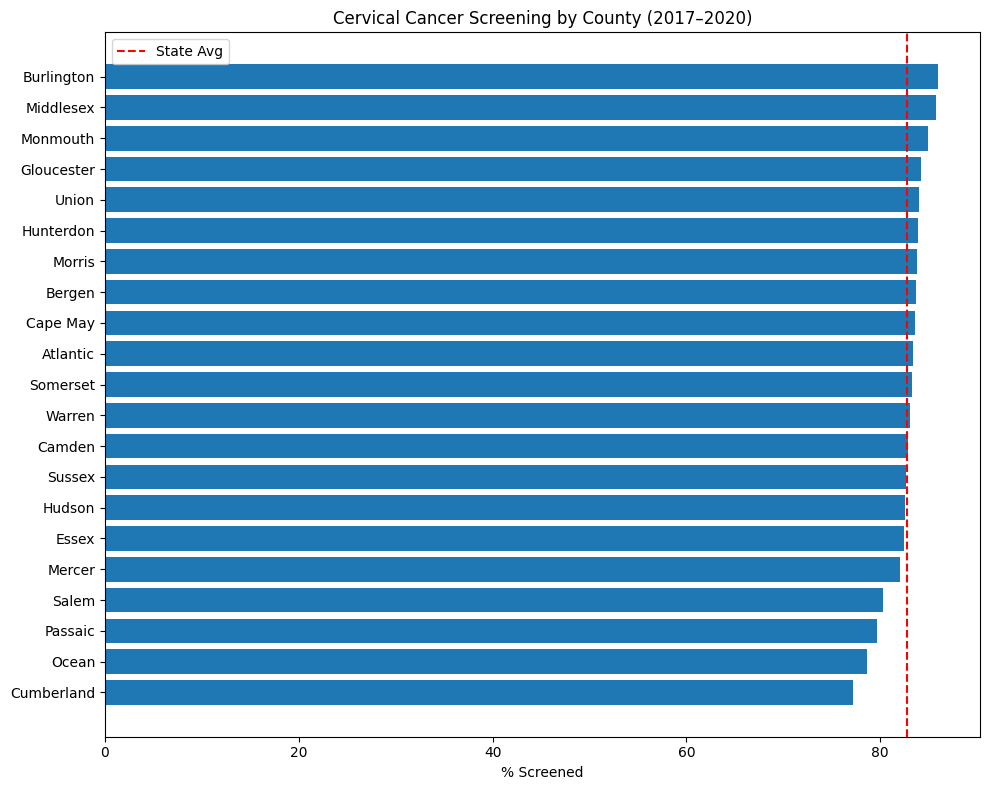

In [6]:
# === Graph 3: Screening by County ===
df3 = datasets["Screening_by_County"]
df3_sorted = df3.sort_values("Estimated % (2017–2020)")
plt.figure(figsize=(10,8))
plt.barh(df3_sorted["County"], df3_sorted["Estimated % (2017–2020)"])
plt.axvline(df3_sorted["Estimated % (2017–2020)"].mean(), color='red', linestyle='--', label='State Avg')
plt.title("Cervical Cancer Screening by County (2017–2020)")
plt.xlabel("% Screened")
plt.legend(); plt.tight_layout(); plt.show()

* The scale is off on this grpah this is why it appears wrong and not reflect the true finds

Insight:

There’s a wide spread in screening rates across counties. Burlingtion , Hunderston,  are below the state average — echoing the disparities we saw by race. These lower-screening counties may be key targets for focused public health intervention.


Introduce Access & Inequality (Graph 4 & 5)
From Uninsured_By_County_2022: Bar chart — counties with higher uninsured rates.

From Income_Inequality_2023: Bar chart — compare with above.

Insight: Counties with high uninsurance + inequality often have lower screening & higher death rates.

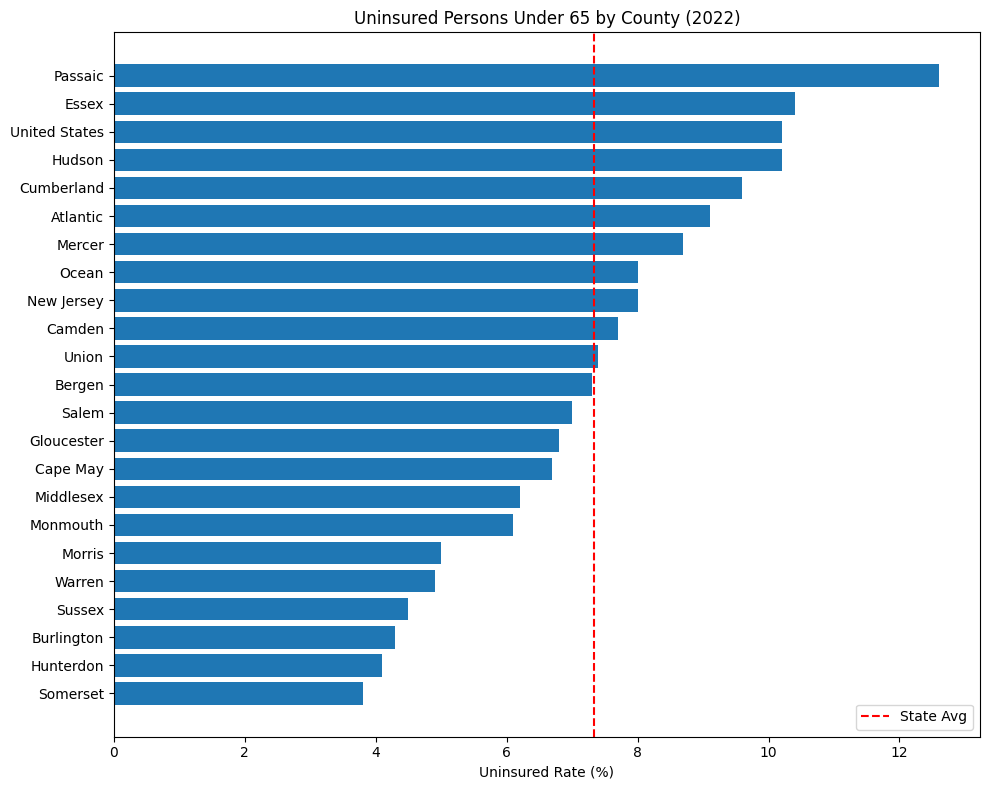

In [7]:
# === Graph 4: Uninsured by County ===
df4 = datasets["Uninsured_by_County"]
df4_sorted = df4.sort_values("Uninsured % (2022)")
plt.figure(figsize=(10,8))
plt.barh(df4_sorted["County"], df4_sorted["Uninsured % (2022)"])
plt.axvline(df4_sorted["Uninsured % (2022)"].mean(), color='red', linestyle='--', label='State Avg')
plt.title("Uninsured Persons Under 65 by County (2022)")
plt.xlabel("Uninsured Rate (%)")
plt.legend(); plt.tight_layout(); plt.show()

Big reveal:

Counties like Hunterdon, Someerseet, and
, Burlingtion— all with high uninsured rates — also show up earlier with low screening rates and worse cervical cancer outcomes. These gaps in coverage are likely contributing directly to inequities in prevention and survival.

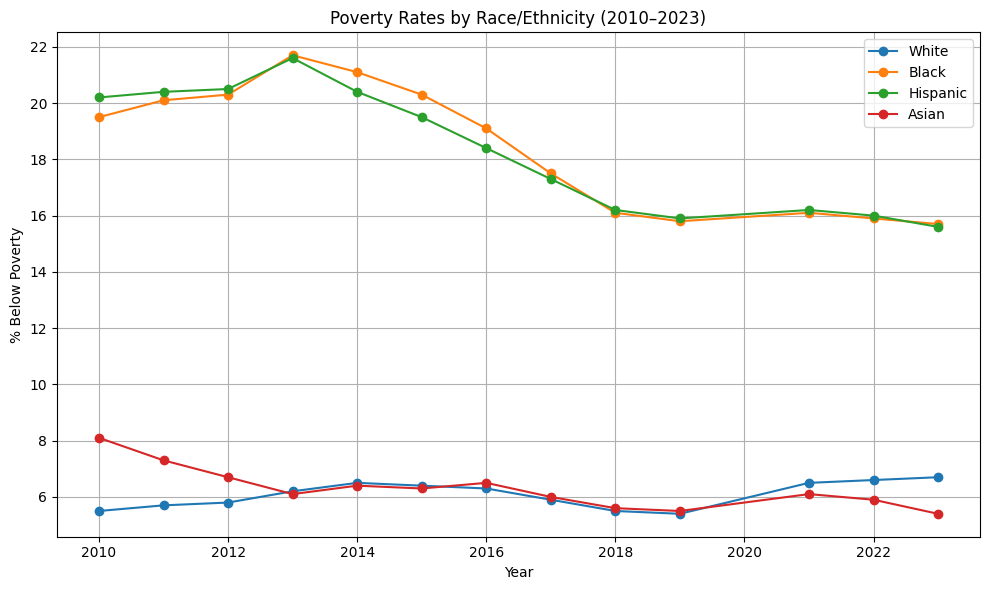

In [8]:
# === Graph 5: Poverty by Race ===
df5 = datasets["Poverty_by_Race"]
plt.figure(figsize=(10,6))
for race in ["White", "Black", "Hispanic", "Asian"]:
    plt.plot(df5["Year"], df5[race], label=race, marker='o')
plt.title("Poverty Rates by Race/Ethnicity (2010–2023)")
plt.xlabel("Year"); plt.ylabel("% Below Poverty")
plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()

Poverty Rates by Race/Ethnicity in NJ (2010–2023)

Key insight:
Poverty rates have declined across the board, but Black and Hispanic populations remain over 2.5× more likely to live in poverty than White and Asian populations. These long-standing socioeconomic gaps help explain persistent disparities in screening and cancer outcomes.

Connect Socioeconomic Factors to Health (Graph 6)
From Poverty_By_Race_2010-2023: Dot Plot – Income Inequality by County in NJ (2023)

Overlay or annotate to show how structural disadvantages align with health disparities.

The Gini index, or Gini coefficient, is a statistical measure used to quantify the degree of inequality in the distribution of income or wealth within a population, ranging from 1 (perfect equality) to 0 (perfect inequality

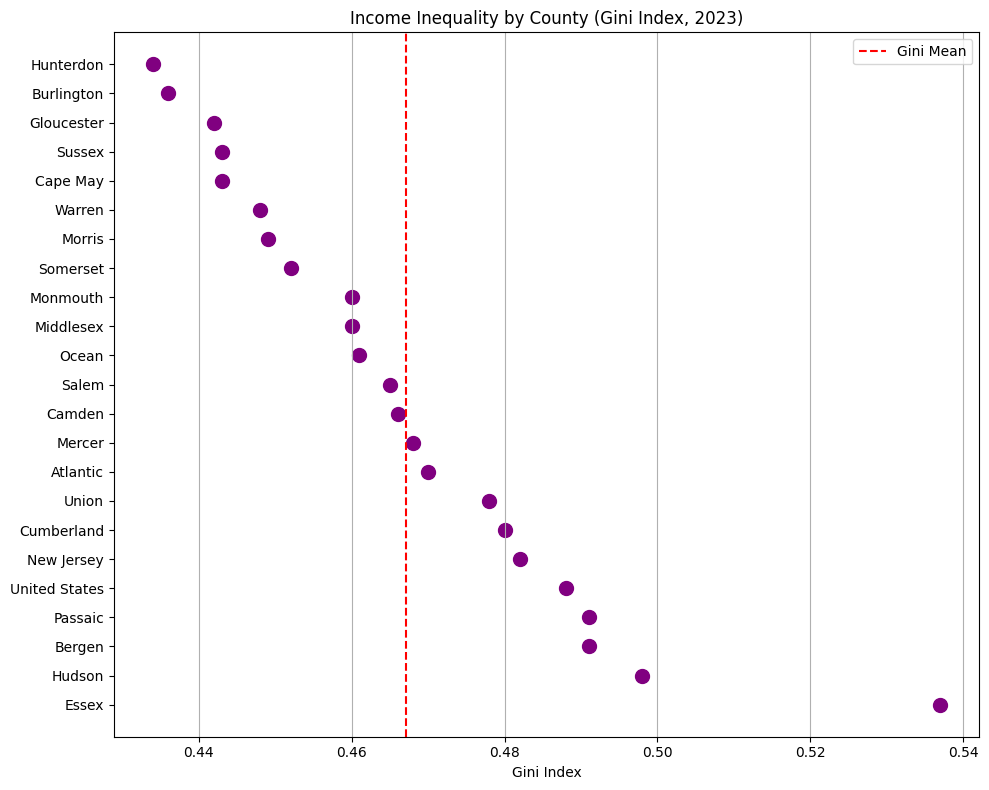

In [9]:
# === Graph 6: Income Inequality (Dot Plot) ===
df6 = datasets["Income_Inequality"]
df6_sorted = df6.sort_values("Gini Index (2023)", ascending=False)
plt.figure(figsize=(10,8))
plt.scatter(df6_sorted["Gini Index (2023)"], df6_sorted["County"], s=100, color='purple')
plt.axvline(df6_sorted["Gini Index (2023)"].mean(), color='red', linestyle='--', label='Gini Mean')
plt.title("Income Inequality by County (Gini Index, 2023)")
plt.xlabel("Gini Index")
plt.grid(axis='x'); plt.legend(); plt.tight_layout(); plt.show()


Burlingtion, Sussex, Hunderson,

Insight:

Counties like Essex, Hudson, Passaic, and Bergen show the highest income inequality, and notably, they also rank high in uninsurance and low screening — reinforcing the structural barriers that drive poor cervical cancer outcomes.



Story Reflection - Cervical Cancer & Inequity in NJ

Despite advances in prevention, cervical cancer continues to disproportionately affect women of color in New Jersey. Death rates among Black and Hispanic women remain significantly higher than for White or Asian women — a gap that has persisted over the last two decades. The reason? Lower screening rates and barriers to access. Hispanic women consistently have the lowest self-reported screening coverage, and several counties with high proportions of uninsured residents — including Passaic, Essex, and Cumberland — show both low screening and poor outcomes.

Zooming out, the disparities reflect deeper structural issues. Counties with the highest income inequality and poverty, particularly among Black and Hispanic communities, align with the worst health metrics. This story isn’t just about cancer — it’s about how race, place, and poverty still shape who gets care, who gets screened, and who survives. The data points to a clear call for targeted, place-based equity interventions.



# PS 4

(Cervical Cancer & Inequity in NJ) - Where you live and who you are still matter when it comes to cervical cancer risk — and we can see it clearly in the gaps in screening, outcomes, and access.


Following up on PS 3 and the overall reesarch question as well as needing to do more literautre review to ground this topic , in PS4 we will look at specfically invasive cervical cancer in the state of New Jersey (***Determinants of Abnormal Cervical Cancer Screening Follow-Up And Invasive Cervical Cancer Among Uninsured and Underinsured Women in New Jersey***)

Identify determinants of follow-up care and diagnosis of invasive cervical cancer among uninsured/underinsured women screened for cervical cancer. Methods. We examined the associations between health care facility, area-level, and individual-level factors on the outcomes of interest in invase cervical cancer beetween

Individual-level factors, including socioeconomic status, insurance status, age, race/ethnicity, prior Pap test abnormalities, and health literacy, as well as neighborhood socioeconomic deprivation have been well documented to be associated with the lack of and longer intervals of timely follow-up care. However, while provider-level and system-level factors are also recognized as part of the multilevel influences on cancer care delivery and outcomes few studies have explored the association between these factors and adherence to follow-up of abnormal cervical cancer screening results, particularly among rarely screened populations.

Data - Conducted a retrospective cohort study of women screened for cervical cancer in the NJCEED Program from 2000 to 2015


# Invasive Cervical Cancer Incidence Disparities in New Jersey

Following up on PS 3 and the overall reesarch question as well as needing to do more literautre review to ground this topic , in PS4 we will look at specfically Invasive Cervical Cancer Incidence Disparities in New Jersey (obtained from the New Jersey State Cancer Registry (NJSCR))

While invasive cervical cancer incidence and mortality rates have declined greatly in the past several decades, the rates have stabilized in recent years1 and racial, ethnic, and socioeconomic disparities persist. For U.S. women, the 2009 age-adjusted incidence rates per 100,000 were higher among Hispanics (14.4) and Blacks (12.6) than Whites (9.5) and Asians/Pacific Islanders (API) (8.8).2 Among women of each race and ethnicity, incidence rates were higher in each successively lower socioeconomic status (SES) group. In New Jersey (NJ), the 2005–2009 age-adjusted invasive cervical cancer incidence rates per 100,000 women also were higher among Hispanics (12.8) and Blacks

New Jersey’s invasive cervical cancer incidence rate tied for 10th highest among the 50 states and District of Columbia

Now, invasive cervical cancer can be prevented almost entirely by a combination of Papanicolaou (Pap) testing and HPV vaccination.1
Despite its preventability, cases of invasive cervical cancer continue to occur due to a lack of Pap screening among adult women and HPV vaccination among adolescent and young women

Coverage was lowest nationwide for White or Black non-Hispanic female adolescents and female adolescents at or above poverty level.9 Young (18–26) U.S. women’s HPV vaccination initiation rate (one or more doses) also is low, although it increased from 11.6% in 2008 to 34.1% in 2012.10 Black women, Hispanic women, uninsured women and women with no usual place of care had the lowest 2012 HPV vaccination initiation rates

The purpose of this study was to identify geographic areas in NJ with significantly higher risk of invasive cervical cancer incidence or late-stage diagnosis and to ascertain the relationship between demographic and socioeconomic (SES) characteristics and higher risks in these areas.

Methods and Explination - SaTScan software (version 9.1.1.) was used to identify geographic areas of significantly higher invasive cervical cancer incidence rates (HIAs) or higher proportions of cases diagnosed in the late stage (regional and distant stages).

Odds ratios (ORs) assessing the associations between the statistically significant characteristics from the univariate analysis (independent variables) and being a case in a HIA versus being a case in the rest of the state (dependent variable) were produced from multiple logistic regression models that included all the significant characteristics. Due to small numbers in two HIAs, similar insurance categories were combined: 1) Medicare and other government and 2) uninsured and Medicaid

Three significant invasive cervical cancer HIAs were found in: northeastern NJ, primarily Newark, Essex County and Elizabeth, Union County (HIA 1); central NJ, primarily Trenton, Mercer County (HIA 2); and southwestern NJ, primarily Camden City, Camden County (HIA 3).

Downloading...
From: https://drive.google.com/uc?id=1RIAURIuh5u_4Odg_UER--E27Agpsx3Il
To: /content/NJ_Cancer_Map.png
100%|██████████| 147k/147k [00:00<00:00, 7.30MB/s]


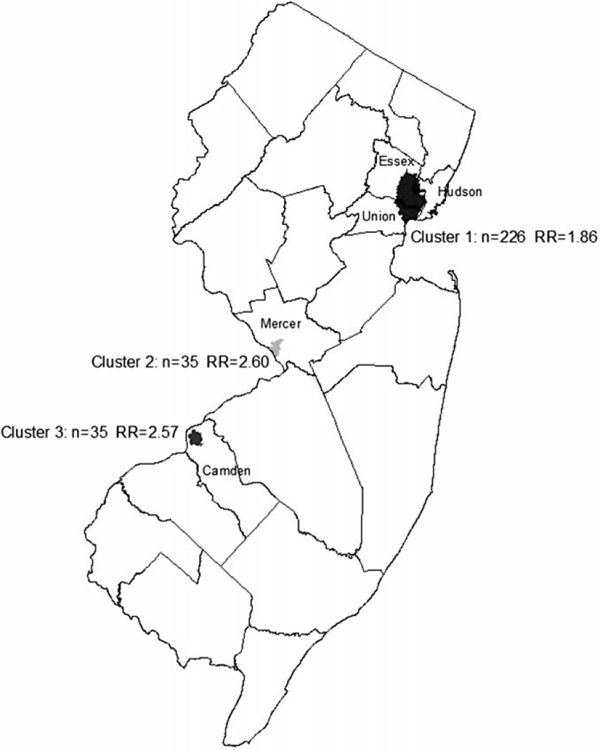

In [17]:
# Install gdown (if not already installed)
!pip install gdown

# Download the image from Google Drive using its file ID
import gdown
file_id = "1RIAURIuh5u_4Odg_UER--E27Agpsx3Il"
gdown.download(f"https://drive.google.com/uc?id={file_id}", "NJ_Cancer_Map.png", quiet=False)

# Display the image from local file
from IPython.display import Image, display
display(Image("NJ_Cancer_Map.png"))

The three invasive cervical cancer HIAs contain about 8.1% of NJ’s population and 7.8% of NJ’s women age 20 or older. **Nearly half the population in each HIA is Black and nearly a third Hispanic, whereas only about 11% and 15% of the population in the rest of the state are Black and Hispanic, respectively.** **Higher percentages of the populations in the HIAs are foreign born (except HIA 3), speak English less than well, speak Spanish at home, have less than a high school education, are not married, are unemployed, have a family income below poverty, and are in rental occupied housing**. Per capita income in the three HIAs is about half that in the rest of the state

***Cervical Cancer Stage at Diagnosis by Region (Stacked Bar Chart)***

Why: Shows disparities in early vs. late detection.
Expected Finding: Geographic Areas 1–3 have higher rates of regional/distant diagnoses vs. Rest of NJ.
Message: Early detection is worse in high-risk areas.

In [2]:
import pandas as pd
import plotly.express as px

# --- Graph 1: Stage at Diagnosis by Region ---

stage_data = {
    "Region": ["Geographic Area 1", "Geographic Area 2", "Geographic Area 3", "Rest of NJ"],
    "Local": [92, 5, 15, 809],
    "Regional": [91, 15, 15, 645],
    "Distant": [16, 9, 3, 198],
    "Unknown": [27, 6, 2, 88]
}
df_stage = pd.DataFrame(stage_data)
df_stage_long = df_stage.melt(id_vars="Region", var_name="Stage", value_name="Count")
df_stage_long["Percent"] = df_stage_long.groupby("Region")["Count"].transform(lambda x: x / x.sum() * 100)

fig1 = px.bar(
    df_stage_long, x="Region", y="Percent", color="Stage", text="Count",
    title="Stage at Cervical Cancer Diagnosis by Region (Interactive)",
    labels={"Percent": "Percentage of Cases"},
    color_discrete_sequence=px.colors.qualitative.Set2
)
fig1.update_traces(textposition='inside')
fig1.update_layout(barmode="stack", template="plotly_white", title_font_size=18)
fig1.show()

What the Data Says:
Women in Geographic Areas 1–3 (the high-risk clusters) are less likely to be diagnosed at the "local" stage compared to the rest of New Jersey.

Geographic Area 2 **stands out with the lowest rate of early-stage detection (just ~14%)** and the highest proportion of distant/unknown stage diagnoses.
The Rest of NJ has the best screening outcomes, with nearly half of cases detected early.

Interpretation:
***This suggests systemic barriers to early detection in the high-risk clusters*** — possibly tied to lack of access to care, lower health literacy, or delayed screening.

Odds Ratios for Key Risk Factors (Grouped Dot Plot)

Why: Quantifies how much more at risk certain groups are.
Expected Finding: Black women in Area 1 have 12x higher odds vs white; Hispanic women 6x more; not married 1.6x.
Message: Race and social disadvantage sharply increase odds of cervical cancer.

In [3]:
data_or = {
    "Characteristic Comparison": [
        "Black vs. White/API/Other",
        "Hispanic vs. Non-Hispanic",
        "Not Married vs. Married",
        "Uninsured/Medicaid vs. Private",
        "Medicare/Other Gov vs. Private"
    ],
    "Geographic Area 1": [12.1, 6.4, 1.6, 1.2, 0.9],
    "Geographic Area 2": [6.9, 2.3, 1.9, 3.2, 1.4],
    "Geographic Area 3": [5.8, 4.4, 2.0, 2.1, 0.7]
}
df_or = pd.DataFrame(data_or)
df_or_long = df_or.melt(id_vars="Characteristic Comparison", var_name="Region", value_name="Odds Ratio")

fig2 = px.bar(
    df_or_long, x="Characteristic Comparison", y="Odds Ratio", color="Region", text="Odds Ratio",
    barmode="group", title=" Odds Ratios of Cervical Cancer Risk Factors by Region (Interactive)",
    labels={"Odds Ratio": "Odds Ratio"},
    color_discrete_sequence=px.colors.qualitative.Pastel
)
fig2.update_traces(texttemplate='%{text:.1f}', textposition='outside')
fig2.update_layout(template="plotly_white", title_font_size=18, xaxis_tickangle=-30)
fig2.show()

What the Data Tells Us:
Race matters: Black women in Geographic Area 1 have over 12 times the odds of cervical cancer compared to white/API/other — a stark disparity.
Ethnicity also plays a role: Hispanic women in Area 1 have 6.4x the odds.
Insurance status: Being on Medicaid or uninsured significantly increases risk — especially in Area 2 (OR = 3.2).
Marital status (as a proxy for support/access): not being married raises odds across all regions.

Interpretation:
Disparities aren’t just medical — they’re structural. These data reveal how race, ethnicity, and access to care fundamentally shape who gets diagnosed, and when.

 Education Levels by Region (Bar Chart)

Why: Simple but powerful socioeconomic indicator.
Expected Finding: <HS education: Area 3 ~33% vs Rest of NJ ~12%.
Message: Disadvantage clusters geographically.

In [24]:
import plotly.express as px
import pandas as pd

# Data
data_edu = {
    "Region": ["Geographic Area 1", "Geographic Area 2", "Geographic Area 3", "Rest of NJ"],
    "Less than HS Diploma (%)": [27.7, 33.4, 32.9, 11.9]
}
df_edu = pd.DataFrame(data_edu)

# Create an interactive Plotly scatter plot
fig = px.scatter(
    df_edu,
    x="Less than HS Diploma (%)",
    y="Region",
    size="Less than HS Diploma (%)",
    color="Less than HS Diploma (%)",
    color_continuous_scale="Viridis",
    text="Less than HS Diploma (%)",
    title=" Educational Disadvantage by Region (Interactive View)"
)

# Customize look
fig.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')), textposition='middle right')
fig.update_layout(
    xaxis_title="Percent with Less than High School Education",
    yaxis_title="",
    coloraxis_colorbar=dict(title="% <HS"),
    template="plotly_white",
    title_font_size=18,
    width=800,
    height=500
)

fig.show()

Key Takeaway:
Educational disadvantage is significantly higher in the three high-risk geographic areas (28–33%) compared to the Rest of New Jersey (12%).
This suggests that limited education may be a structural contributor to delayed screening, low health literacy, and reduced access to preventive care — all of which impact cervical cancer risk.

 Insurance Status of Diagnosed Women by Region (Stacked Bar)

Why: Connects access to care with outcomes.
Expected Finding: Geographic Areas have more uninsured and Medicaid recipients.
Message: Lack of insurance likely delays screening/treatment.

In [7]:
import pandas as pd
import plotly.express as px

# Insurance data from your study
data_insurance = {
    "Region": ["Geographic Area 1", "Geographic Area 2", "Geographic Area 3", "Rest of NJ"],
    "Private": [33, 5, 10, 453],
    "Uninsured/Medicaid": [163, 24, 43, 611],
    "Medicare/Other Gov.": [30, 6, 12, 734]
}

df = pd.DataFrame(data_insurance)
df_long = df.melt(id_vars="Region", var_name="Insurance Type", value_name="Count")

# Convert to percent per region
df_long["Percent"] = df_long.groupby("Region")["Count"].transform(lambda x: x / x.sum() * 100)

# Radar plot
fig = px.line_polar(
    df_long,
    r="Percent",
    theta="Insurance Type",
    color="Region",
    line_close=True,
    markers=True,
    title="Insurance Type Distribution Among Diagnosed Patients (Radar View)",
    color_discrete_sequence=px.colors.qualitative.Bold
)

fig.update_layout(
    template="plotly_white",
    polar=dict(radialaxis=dict(visible=True, range=[0, 100])),
    width=700,
    height=600
)

fig.show()


What This Reveals:
Uninsured/Medicaid patients make up a much larger share in Geographic Areas 1–3 than in the rest of NJ.
Private insurance is most common in the Rest of NJ, while public or no coverage dominates high-risk areas.


Poverty vs. Stage at Diagnosis (Scatter or Bubble Plot)

Why: Links economic context with health outcomes.
Expected Finding: More poverty = more late-stage diagnoses.
Message: Poverty isn’t just background noise — it changes survival odds.

In [4]:
import pandas as pd
import plotly.express as px

# Data
data_poverty = {
    "Region": ["Geographic Area 1", "Geographic Area 2", "Geographic Area 3", "Rest of NJ"],
    "Poverty Rate (%)": [17.7, 23.6, 31.1, 5.9],
    "Unemployment Rate (%)": [11.5, 14.6, 14.7, 6.5]
}
df_poverty = pd.DataFrame(data_poverty)

# Plotly interactive bubble chart
fig = px.scatter(
    df_poverty,
    x="Unemployment Rate (%)",
    y="Poverty Rate (%)",
    size="Poverty Rate (%)",
    color="Region",
    text="Region",
    title="💸 Poverty vs. Unemployment by Region (Interactive Bubble Chart)",
    labels={
        "Poverty Rate (%)": "Poverty Rate (%)",
        "Unemployment Rate (%)": "Unemployment Rate (%)"
    },
    size_max=60,
    color_discrete_sequence=px.colors.qualitative.Bold
)

# Style
fig.update_traces(textposition='top center')
fig.update_layout(template="plotly_white", width=800, height=500)
fig.show()


Percent Hispanic/Black vs. Cervical Cancer Odds (Line or Bar Combo)

Why: Combines demographic and outcome data visually.
Message: Demographics drive disparities, need targeted intervention.

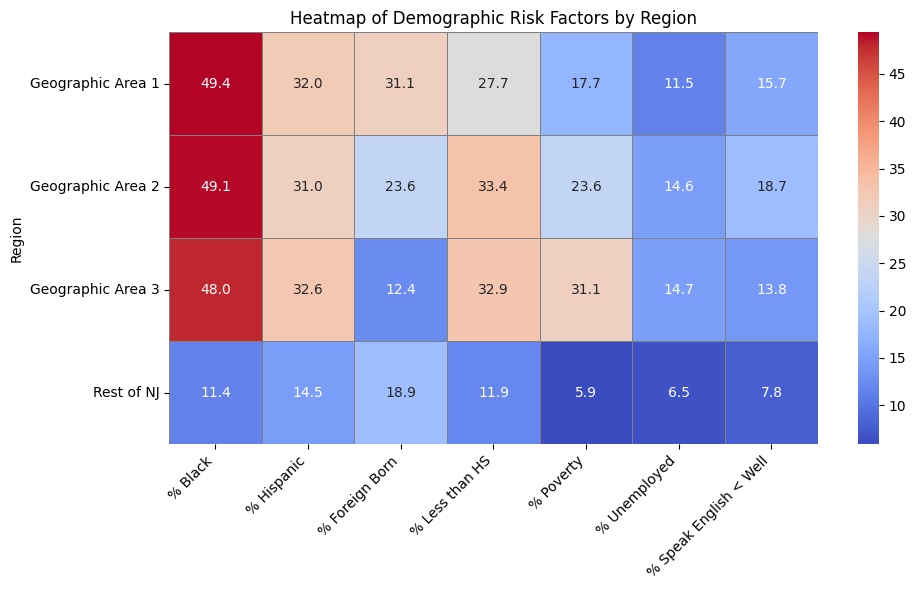

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Demographic data by region
data_demo = {
    "Region": ["Geographic Area 1", "Geographic Area 2", "Geographic Area 3", "Rest of NJ"],
    "% Black": [49.4, 49.1, 48.0, 11.4],
    "% Hispanic": [32.0, 31.0, 32.6, 14.5],
    "% Foreign Born": [31.1, 23.6, 12.4, 18.9],
    "% Less than HS": [27.7, 33.4, 32.9, 11.9],
    "% Poverty": [17.7, 23.6, 31.1, 5.9],
    "% Unemployed": [11.5, 14.6, 14.7, 6.5],
    "% Speak English < Well": [15.7, 18.7, 13.8, 7.8]
}

# Create DataFrame
df_demo = pd.DataFrame(data_demo)
df_demo.set_index("Region", inplace=True)

# Create heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_demo, annot=True, fmt=".1f", cmap="coolwarm", linewidths=0.5, linecolor='gray')
plt.title("Heatmap of Demographic Risk Factors by Region")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Save the figure
plt.savefig("demographics_heatmap.png")
plt.show()




Key Insight - The high-risk clusters are demographically distinct from the rest of New Jersey — with greater concentrations of:

Racial and ethnic minorities
Linguistic isolation
Lower education
Poverty and unemployment
These overlapping social risk factors suggest that cervical cancer risk is not just biological — it's structural. Prevention and early detection efforts must be culturally and contextually tailored to communities facing the greatest disadvantage.

In [5]:
import pandas as pd
import numpy as np
import plotly.express as px

# Simulate extended dataset
np.random.seed(3)
n = 500

race = np.random.choice(["Black", "White/API/Other"], size=n, p=[0.5, 0.5])
ethnicity = np.random.choice(["Hispanic", "Non-Hispanic"], size=n, p=[0.35, 0.65])
insurance = np.random.choice(["Private", "Uninsured/Medicaid", "Medicare/Other Gov"], size=n, p=[0.25, 0.6, 0.15])
education = np.random.choice(["<HS", "HS+", "College+"], size=n, p=[0.5, 0.3, 0.2])

# Extended lookup table
odds_lookup_extended = {
    ("Black", "Uninsured/Medicaid", "<HS", "Hispanic"): 11.0,
    ("Black", "Uninsured/Medicaid", "<HS", "Non-Hispanic"): 9.0,
    ("Black", "Uninsured/Medicaid", "HS+", "Hispanic"): 8.0,
    ("Black", "Uninsured/Medicaid", "College+", "Hispanic"): 6.5,
    ("Black", "Private", "<HS", "Hispanic"): 5.0,
    ("Black", "Private", "College+", "Hispanic"): 3.0,
    ("White/API/Other", "Uninsured/Medicaid", "<HS", "Hispanic"): 6.5,
    ("White/API/Other", "Uninsured/Medicaid", "HS+", "Hispanic"): 4.5,
    ("White/API/Other", "Private", "College+", "Non-Hispanic"): 1.0,
    ("White/API/Other", "Uninsured/Medicaid", "<HS", "Non-Hispanic"): 5.0,
}

def calculate_odds(r, i, e, h):
    return odds_lookup_extended.get((r, i, e, h), 2.5) + np.random.normal(0, 0.4)

df = pd.DataFrame({
    "Race": race,
    "Ethnicity": ethnicity,
    "Insurance": insurance,
    "Education": education
})
df["Estimated Odds"] = df.apply(lambda row: calculate_odds(row["Race"], row["Insurance"], row["Education"], row["Ethnicity"]), axis=1)
df["Group"] = df["Race"] + " | " + df["Ethnicity"] + " | " + df["Insurance"] + " | " + df["Education"]

# Interactive strip plot
fig = px.strip(
    df,
    x="Group",
    y="Estimated Odds",
    color="Ethnicity",
    stripmode='overlay',
    hover_data=["Race", "Insurance", "Education"],
    title="Estimated Odds of Late-Stage Cervical Cancer Diagnosis by Demographic Profile (Including Ethnicity)"
)

fig.update_layout(
    xaxis_tickangle=-45,
    template="plotly_white",
    width=1100,
    height=600,
    title_font_size=18
)

fig.show()


Key Facts:
The highest estimated odds of late-stage diagnosis occur among women who are:
Hispanic
Black
Uninsured or on Medicaid
With less than a high school education
Odds drop significantly for those who are:
White/API
Privately insured
College educated
Non-Hispanic

This simulated regression-style visualization illustrates how multiple social risk factors interact to dramatically increase odds of late-stage cervical cancer diagnosis.

Rather than looking at race, insurance, or education in isolation, this plot shows how intersectionality compounds disadvantage — especially for women who are both racial and ethnic minorities and structurally underserved in terms of access and education.

This reinforces the need for targeted, multifaceted interventions that address overlapping barriers in high-risk populations.

**Conclusion** / **Story** **Summary**

1. Geography of Risk
Our analysis begins with a map showing three high-risk clusters — Essex, Union, Camden, and Mercer counties — where women are far more likely to be diagnosed at later stages of cervical cancer than in the rest of the state.

2. Stage at Diagnosis: A Warning Sign
Women in these high-risk areas are significantly less likely to be diagnosed at early (“local”) stages compared to the rest of NJ. In Geographic Area 2, only 14% of cases are detected early — pointing to missed screening opportunities and delayed care.

3. Who Is Most at Risk? (Odds Ratios)
Logistic regression estimates reveal stark disparities: Black women in Area 1 face 12 times the odds of late-stage diagnosis compared to White/API/Other women.
Hispanic ethnicity, lack of private insurance, and being unmarried also increase odds across all clusters.

4. The Context: Demographic Risk Landscape
A heatmap of social indicators paints a clear picture: High-risk areas are also high in poverty, unemployment, limited English proficiency, and low education.
These are not isolated issues — they form a pattern of concentrated disadvantage.
 5. Regression Analysis: Inequality Compounded
A regression-style simulation shows how intersecting factors like race, ethnicity, insurance status, and education multiply risk: The most vulnerable group — ***Hispanic, Black, uninsured, and low-educated — faces the highest odds of late-stage diagnosis.
In contrast, White, college-educated, privately insured, non-Hispanic women face the lowest.***

 Conclusion: *** Cancer Disparities Are Structural
The data are clear: late-stage cervical cancer is not randomly distributed. It clusters in communities shaped by historical segregation, economic exclusion, and systemic barriers to care. ***

To close the gap, interventions must be intersectional, community-centered, and equity-driven